# Proyek Analisis Data: [Bike Sharing Dataset]

- **Nama:** [Fransiskus Xaverius Edrianto Putra Wijaya]
- **Email:** [fx.edrianto@gmail.com]
- **ID Dicoding:** [ditto_101]

## Menentukan Pertanyaan Bisnis

- Berapa banyak orang yang menyewa sepeda di tahun 2011 dibandingkan tahun 2012?
- Bagaimana hari libur mempengaruhi banyaknya orang yang menyewa sepeda?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
df_day = pd.read_csv("/content/Dicoding_Analisis data dengan python/day.csv", delimiter=",")

Disini digunakan dataset day.csv

### Assessing Data

In [ ]:
print(len(df_day[df_day['yr'] == 0]))

365


In [ ]:
print(len(df_day[df_day['yr'] == 1]))

366


Fungsi len() digunakan untuk melihat ada berapa record di tahun 2011(0) dan 2012(1)

In [ ]:
df_day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
df_day.duplicated().sum()

0

In [ ]:
df_day_field = 'cnt'

Q1 = (df_day[df_day_field]).quantile(0.25)
Q3 = (df_day[df_day_field]).quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)

kondisi_lower_than = df_day[df_day_field] < minimum
kondisi_more_than = df_day[df_day_field] > maximum

for data in kondisi_lower_than:
  if data == True:
    print(data)

### Cleaning Data

Pada dataset day.csv tidak ada data yang kosong, tidak ada data duplikat, dan tidak ditemukan outlier. Maka tidak perlu dilakukan cleaning data

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Disini kita melihat info dari setiap field pada tabel beberapa field ini tidak terlalu penting untuk dilihat. Kecuali hal seperti 'cnt' yang menunjukkan jumlah total rental per hari.

array([[<Axes: title={'center': 'cnt'}>]], dtype=object)

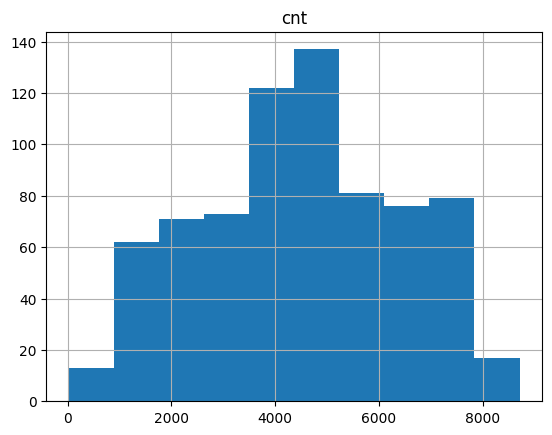

In [ ]:
df_day.hist('cnt')

Disini ditunjukkan sebuah histogram pada field 'cnt'. Jika dilihat, kita paling banyak mendapatkan sekitar 4000-5000 rental per hari

In [ ]:
df_day.corr()

<ipython-input-10-d86ec6c860d3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_day.corr()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.152638,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066


Tabel ini menunjukkan bagaimana field pada data set mempengaruhi field lain yang ada di data set tersebut. Jika hasil korelasinya adalah positif, dan mendekati angka 1 maka kedua field tersebut memengaruhi field satunya lagi untuk bertingkat secara positif. Hal ini penting untuk diketahui karena kita tentunya ingin meningkatkan atau menetapkan nilai field 'cnt' agar tidak turun.

In [ ]:
df_day.groupby(by='yr').agg({
    'yr': 'max',
    'cnt': ['mean', 'max', 'min'],
})

yr          cnt           
   max         mean   max  min
yr                            
0    0  3405.761644  6043  431
1    1  5599.934426  8714   22

Pada tabel ini kita lihat informasi mengenai 'cnt' pada tahun 2011 dan 2012. Terlihat bahwa tahun 2012 memiliki angka yang lebih tinggi pada mean dan max. Tetapi memiliki angka yang terendah pada min. Jika kita bisa mencari tahu alasan kenapa hal itu bisa terjadi, kita bisa mencoba untuk mencegah hal itu untuk terjadi lagi.

In [ ]:
value = 22
result = df_day[df_day['cnt'] == value]
print(result)

     instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
667      668  2012-10-29       4   1    10        0        1           1   

     weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
667           3  0.44  0.4394  0.88     0.3582       2          20   22  


Diatas ini adalah info mengenai hari dimana kita hanya menyewa sebanyak 22 sepeda.

In [ ]:
df_day.groupby(by='holiday').agg({
    'holiday': 'max',
    'cnt': ['mean', 'max', 'min'],
})

holiday          cnt            
            max         mean   max   min
holiday                                 
0             0  4527.104225  8714    22
1             1  3735.000000  7403  1000

Berikut kita lihat efek dari hari libur kepada jumlah rental sepeda. Terlihat secara rata-rata, hari libur membuat jumlah sepeda yang dirental menjadi menurun.

In [ ]:
value = 8714
result = df_day[df_day['cnt'] == value]
print(result)

     instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
623      624  2012-09-15       3   1     9        0        6           0   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
623           1  0.608333  0.585867  0.501667   0.247521    3160        5554   

      cnt  
623  8714  


Ini adalah record dari nilai 'cnt' yang paling tertinggi. Dengan mengetahui informasi ini, kita bisa mencoba mereplikasinya di masa depan. Atau jika di masa depan ditemukan lagi kondisi yang mirip dengan record ini, kita bisa kembangkan lagi agar mendapatkan nilai 'cnt' yang lebih tinggi.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

- Berapa banyak orang yang menyewa sepeda di tahun 2011 dibandingkan tahun 2012?


<BarContainer object of 731 artists>

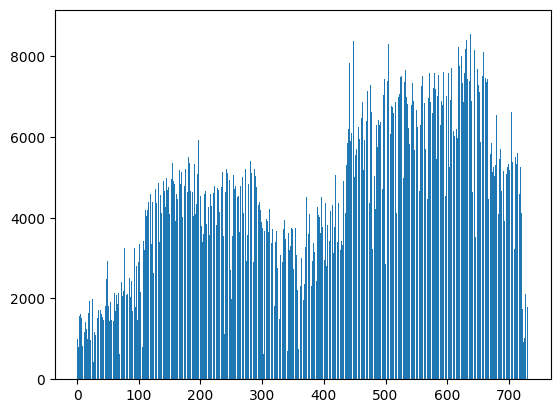

In [ ]:
plt.bar(x=df_day['instant'], height=df_day['cnt'])

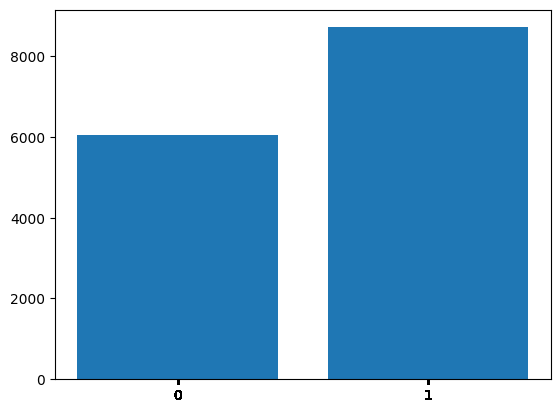

In [ ]:
x = df_day['yr']
y = df_day['cnt']
plt.bar(x,y)
plt.xticks(x)

plt.show()

### Pertanyaan 2:

- Bagaimana hari libur mempengaruhi banyaknya orang yang menyewa sepeda?

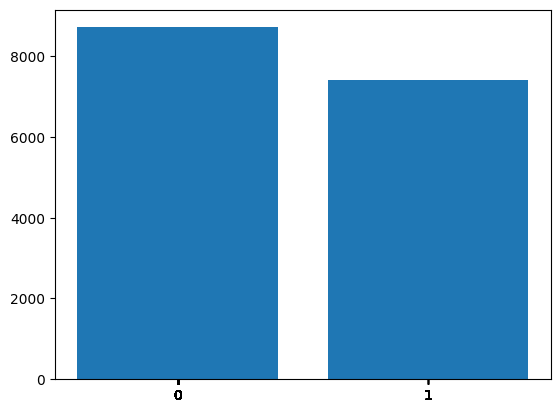

In [ ]:
x = df_day['holiday']
y = df_day['cnt']
plt.bar(x,y)
plt.xticks(x)
plt.show()

## Conclusion

- Berapa banyak orang yang menyewa sepeda di tahun 2011 dibandingkan tahun 2012?
  - Jawaban : Jumlah orang yang menyewa sepeda lebih banyak di tahun 2012, hal ini menunjukkan bahwa bisnis telah berkembang
- Bagaimana hari libur mempengaruhi banyaknya orang yang menyewa sepeda?
  - Jawaban : Secara umum, hari libur mengurangi jumlah orang yang menyewa sepeda. Dengan itu, kita antara bisa mengurangi sumber daya di hari libur agar tidak terbuang. Atau mengganti cara kerja marketing atau hal lainnya, untuk menarik orang untuk menyewa sepeda.